<h1> <b> Lab - 5 </b> </h1>
<br>
<h3>Decision tree implementation on digits dataset</h3>
<br>

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

<br/><h2> <b> Load dataset </b> </h2><br/>

In [2]:
digits = datasets.load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

<br/><h2> <b> Extract features. </b> </h2><br/>

In [3]:
features = digits.data
print("Features: \n", features)

Features: 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


<br/><h2> <b> Extract targets. </b> </h2><br/>

In [4]:
targets = digits.target
print("Targets: ", targets)

Targets:  [0 1 2 ... 8 9 8]


In [5]:
# print the names of the features

print("Features name: ", digits.feature_names)

Features name:  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [6]:
print("Targets name: ", digits.target_names)

Targets name:  [0 1 2 3 4 5 6 7 8 9]


In [7]:
# print data(feature)shape
print("Shape of the features: ", features.shape)

Shape of the features:  (1797, 64)


<br/><h2> <b> Perform one hot encoding. </b> </h2><br/>

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()


In [18]:
encoder.fit(features)
features_encoded = encoder.transform(features)
features_encoded.shape

(1797, 890)

In [19]:
features_names = []

for i in range(890):
  features_names.append(str(i))

# features_names

<br/><h2> <b> Split the dataset into training and testing data.  </b> </h2><br/>

In [11]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
inputs_train, inputs_test, targets_train, targets_test = train_test_split( 
    features_encoded, targets, test_size = 0.35, random_state = 46)


# print("Training Inputs: \n", inputs_train)
# print("\nTesting Inputs: \n", inputs_test)
# print("\nTraining Targets: \n", targets_train)
# print("\nTesting Targets: \n", targets_test)

<br/><h2> <b> Create decision tree classifier with respect to gini index. </b> </h2><br/>

In [21]:
# Create a Decision Tree Classifier (using Gini index)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 46, max_depth=3, min_samples_leaf = 46)

# Train the model using the training sets

clf_gini.fit(inputs_train, targets_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=46, random_state=46)

In [22]:
#Predict Output

target_pred = clf_gini.predict(inputs_test)
print("Predicted ouptut: \n", target_pred)

Predicted ouptut: 
 [5 6 6 6 3 3 9 5 6 3 9 7 5 7 3 7 3 0 7 3 3 9 3 3 3 3 7 3 6 6 7 5 3 3 7 7 7
 3 7 3 0 3 7 0 3 3 3 3 3 6 6 7 3 9 7 5 7 3 3 5 7 6 3 6 5 5 7 3 7 3 5 7 3 5
 5 3 3 3 6 7 3 7 0 3 7 6 7 3 6 3 9 9 0 7 7 7 6 0 3 9 6 3 7 3 5 6 3 3 3 6 3
 5 3 5 7 3 9 0 6 3 9 7 6 3 9 7 3 3 7 3 3 5 3 3 7 0 5 7 3 5 3 6 7 3 6 6 0 5
 3 7 3 7 5 3 7 5 0 5 9 5 0 6 9 3 9 0 3 3 3 3 3 7 3 3 7 3 7 5 6 3 6 6 5 3 3
 5 3 7 5 3 9 3 6 3 3 7 3 3 6 6 3 3 5 7 3 3 6 3 6 3 7 7 3 5 5 0 3 5 6 7 3 3
 5 3 3 0 6 3 7 3 7 7 3 3 5 9 3 3 7 3 7 3 5 3 3 0 3 3 3 6 3 7 3 7 3 9 0 5 5
 3 0 0 7 3 5 3 0 5 7 9 5 3 3 6 3 9 0 6 3 6 7 3 0 7 6 6 3 0 7 3 5 5 3 7 3 3
 5 0 7 7 7 7 7 3 6 6 9 0 7 6 3 0 6 7 3 7 7 7 3 5 6 3 3 3 5 0 7 6 5 3 7 7 3
 6 7 3 7 6 9 3 6 3 6 5 6 6 3 3 0 5 5 3 3 3 6 3 3 7 7 3 3 3 3 5 3 3 3 5 3 6
 0 3 6 3 7 5 3 7 0 3 7 3 3 5 9 7 3 0 3 3 3 3 5 3 3 6 0 7 3 0 0 7 6 9 3 3 3
 3 3 7 5 7 3 0 6 6 3 3 5 3 6 7 0 3 3 6 3 7 3 3 3 7 7 7 9 3 7 3 0 3 7 3 3 7
 7 7 0 9 7 7 3 9 6 3 3 0 6 0 5 5 6 7 3 3 7 3 3 0 3 3 9 6 6 7 7 6 7 3 3 9 7
 3 5 

<br/><h2> <b> Calculate accuracy, precision, and recall. </b> </h2><br/>

In [24]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(targets_test, target_pred))

print("\n\nPrecision: ", metrics.precision_score(targets_test, target_pred, average = 'weighted'))

print("\n\nRecall: ", metrics.recall_score(targets_test, target_pred, average = 'weighted'))

Accuracy:  0.45151033386327505


Precision:  0.3336578000459595


Recall:  0.45151033386327505


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


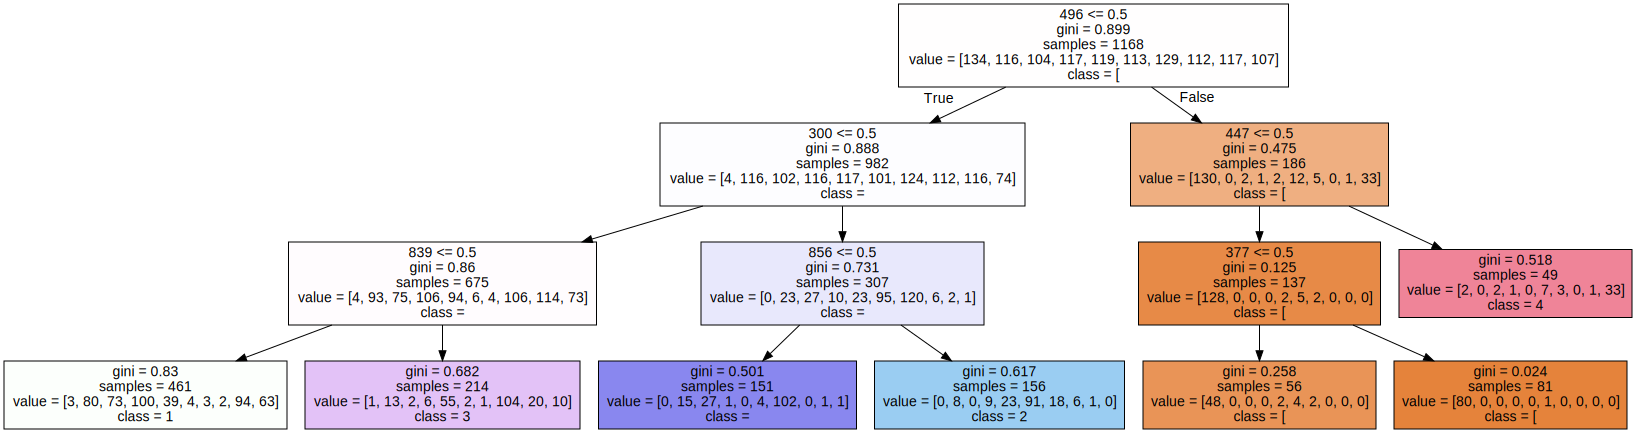

In [26]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_gini, out_file = None, 
                                feature_names = features_names,  
                                class_names = str(digits.target_names), filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph